# Coursera Course Dataset EDA

## Data Visualization with Python. Coursera Course Analysis

### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

Dataset contains 890 various course data with 6 columns of variables.

In [2]:
filename = "./coursera_data.csv"

df = pd.read_csv(filename, encoding='utf-8', index_col=0)

df = df.sort_index(axis=0)
df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


List of variables with description used in this dataset:

* `course_title` : Contains the course title.
* `course_organization` : It tells which organization is conducting the courses.
* `courseCertificatetype` : It has details about what are the different certifications available in courses.
* `course_rating` : It has the ratings associated with each course.
* `course_difficulty` : It tells about how difficult or what is the level of the course.
* `coursestudentsenrolled` : It has the number of students that are enrolled in the course.

Let us do some checks and tests on the data to see if any data cleaning is needed

In [3]:
df.sample(8)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
527,Epidemics - the Dynamics of Infectious Diseases,The Pennsylvania State University,COURSE,4.8,Mixed,45k
684,Write Your First Novel,Michigan State University,COURSE,4.4,Beginner,18k
687,Biohacking Your Brain's Health,Emory University,COURSE,4.6,Beginner,35k
688,Bugs 101: Insect-Human Interactions,University of Alberta,COURSE,4.9,Beginner,15k
343,Newborn Baby Care,University of Colorado System,SPECIALIZATION,4.8,Beginner,5.3k
596,Healthcare Organization Operations,Rutgers the State University of New Jersey,SPECIALIZATION,4.6,Beginner,5.5k
137,Executive Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,170k
562,Implementación del Marketing Mix,IE Business School,SPECIALIZATION,4.7,Beginner,23k


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


There is no `None` values throughout the dataset

Column `course_students_enrolled` values are strings with abbreviations instead of a digits. Let's convert it to digits.

In [5]:
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6'}
df.course_students_enrolled = df['course_students_enrolled'].replace(repl_dict, regex=True).map(pd.eval)

df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0


The data range in column `['course_rating']` should be `[0.0 - 5.0]`. Checking if that is the case + histogram to identify possible outliers.

In [6]:
if df['course_rating'].min() >= 0 and df['course_rating'].max() <= 5:
        print(f"Values of 'course_rating' column is within range [{df['course_rating'].min()} – {df['course_rating'].max()}]")

Values of 'course_rating' column is within range [3.3 – 5.0]


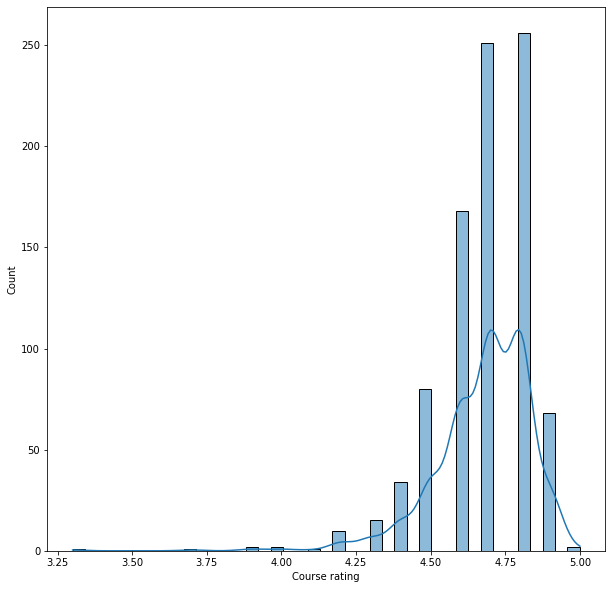

In [7]:
plt.figure(figsize=(10,10))
sns.histplot(data=df['course_rating'], kde=True, legend=False)
plt.xlabel("Course rating")

plt.show()

Below the unique values of categorical columns `['course_certificate_type', 'course_difficulty']` will be checked to see any improper values:

In [8]:
categorical_columns = ['course_Certificate_type', 'course_difficulty']

for column in categorical_columns:
    print(f"Unique values for column '{column}' are: {', '.join(df[column].unique())}")

Unique values for column 'course_Certificate_type' are: PROFESSIONAL CERTIFICATE, SPECIALIZATION, COURSE
Unique values for column 'course_difficulty' are: Beginner, Mixed, Intermediate, Advanced


Let's get a closer look at the values of `'course_organization'` for incosistent data entry/duplicates etc.

In [9]:
course_organizations = df['course_organization'].unique()

course_organizations.sort()
course_organizations

array(['(ISC)²', 'Amazon Web Services',
       'American Institute of Business and Economics',
       'American Museum of Natural History', 'Arizona State University',
       'Atlassian', 'Autodesk', 'Automation Anywhere', 'BCG',
       'Berklee College of Music', 'Birkbeck, University of London',
       'Bloomsbury Learning Exchange', 'California Institute of the Arts',
       'Case Western Reserve University', 'Cisco', 'Cloudera',
       'Columbia University', 'ConsenSys Academy',
       'Copenhagen Business School', 'Crece con Google',
       'Duke University', 'E-Learning Development Fund',
       'EDHEC Business School', 'ESADE Business and Law School',
       'ESCP Business School', 'ESSEC Business School',
       'Eindhoven University of Technology', 'Emory University',
       'Erasmus University Rotterdam',
       'Fundação Instituto de Administração',
       'Georgia Institute of Technology',
       'Goldsmiths, University of London', 'Google',
       'Google - Spectrum Sharin

### Simplified Data Processing and Analysis

Which course(s) has a **highest rating**?

In [10]:
max_rating = df["course_rating"].max()

rating_filter = df.course_rating == max_rating

pd.DataFrame({"course_title": df.course_title[rating_filter],
              "course_organization": df.course_organization[rating_filter], 
              "course_rating": df.course_rating[rating_filter], 
              "course_Certificate_type": df.course_Certificate_type[rating_filter],
              "course_students_enrolled": df.course_students_enrolled[rating_filter]})

,course_title,course_organization,course_rating,course_Certificate_type,course_students_enrolled
401,Infectious Disease Modelling,Imperial College London,5.0,SPECIALIZATION,1600.0
789,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,5.0,COURSE,1500.0


Which course(s) has a **lowest rating**?

In [11]:
min_rating = df["course_rating"].min()

rating_filter = df.course_rating == min_rating

pd.DataFrame({"course_title": df.course_title[rating_filter],
              "course_organization": df.course_organization[rating_filter],
              "course_rating": df.course_rating[rating_filter], 
              "course_Certificate_type": df.course_Certificate_type[rating_filter],
              "course_students_enrolled": df.course_students_enrolled[rating_filter]})

,course_title,course_organization,course_rating,course_Certificate_type,course_students_enrolled
767,How To Create a Website in a Weekend! (Project...,The State University of New York,3.3,COURSE,140000.0


In [12]:
pd.DataFrame({"Rating" : df.course_rating[df.course_organization == "The State University of New York"], 
              "Title" : df.course_title[df.course_organization == "The State University of New York"]})

,Rating,Title
515,4.8,Solar Energy Basics
692,4.6,Practical Time Series Analysis
701,4.4,International Cyber Conflicts
767,3.3,How To Create a Website in a Weekend! (Project...


Statistics on `course_rating` column

In [13]:
df.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


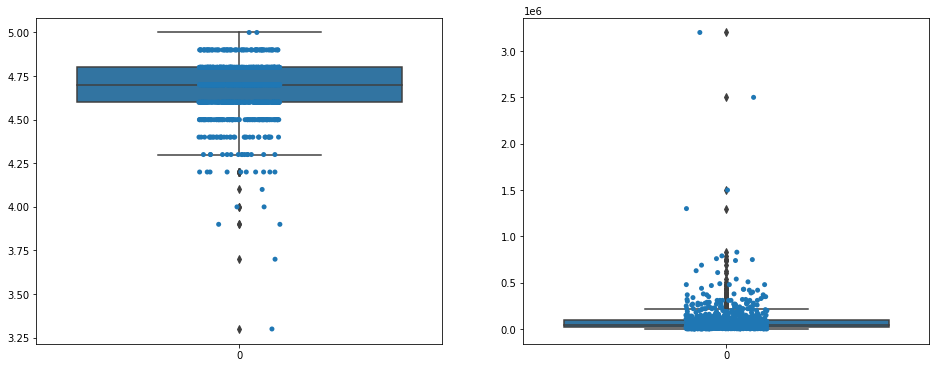

In [14]:
f, ax = plt.subplots(1, 2, figsize=(16,6))
sns.boxplot(data=df['course_rating'], ax=ax[0])
sns.stripplot(data=df['course_rating'], ax=ax[0])

sns.boxplot(data=df['course_students_enrolled'], ax=ax[1])
sns.stripplot(data=df['course_students_enrolled'], ax=ax[1])

plt.show()

Course **count** by their **certificate type** and **difficulty**

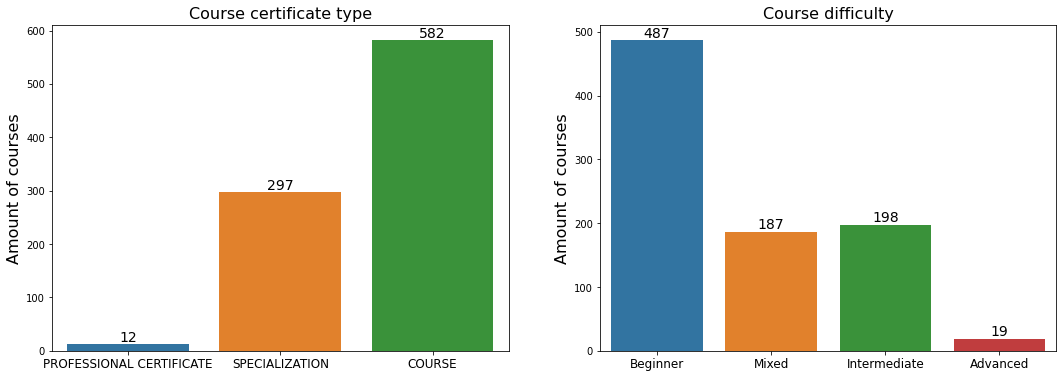

In [15]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

df_columns = ['course_Certificate_type', 'course_difficulty']
names = [' '.join(name.split("_")).capitalize() for name in df_columns]

for j in range(len(ax)):
    sns.countplot(ax=ax[j], x=df_columns[j], data=df)
    ax[j].set_title(names[j], fontsize=16)
    ax[j].bar_label(ax[j].containers[0], fontsize=14)
    ax[j].set_xlabel("", fontsize=16)
    ax[j].set_ylabel("Amount of courses", fontsize=16)
    ax[j].tick_params(axis='x', labelsize=12)

plt.show()

How courses are **distributed** according to their **certificate type** and **difficulty**

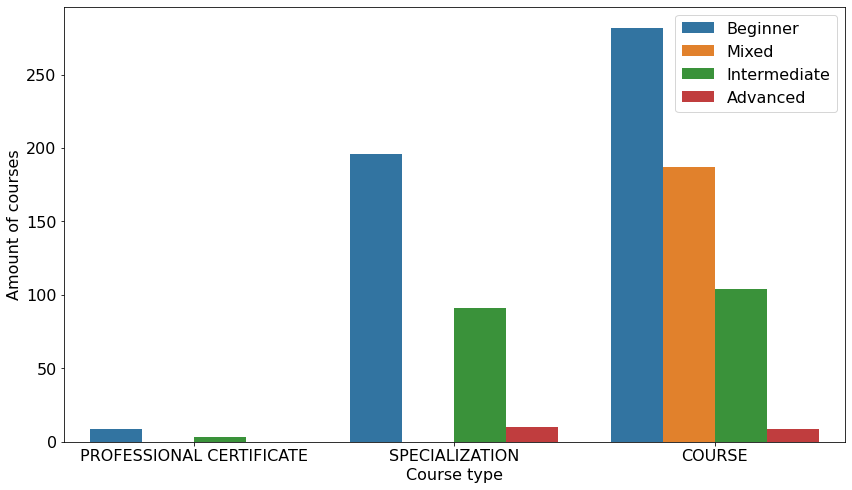

In [16]:
fig, ax = plt.subplots(figsize=(14,8))
sns.countplot(data=df, x='course_Certificate_type', hue='course_difficulty')

ax.set_xlabel("Course type", fontsize=16)
ax.set_ylabel("Amount of courses", fontsize=16)
plt.legend(fontsize = 16)
plt.xticks(size=16)
plt.yticks(size=16)

plt.show()

**Distribution** of courses according to their **rating** and **difficulty**

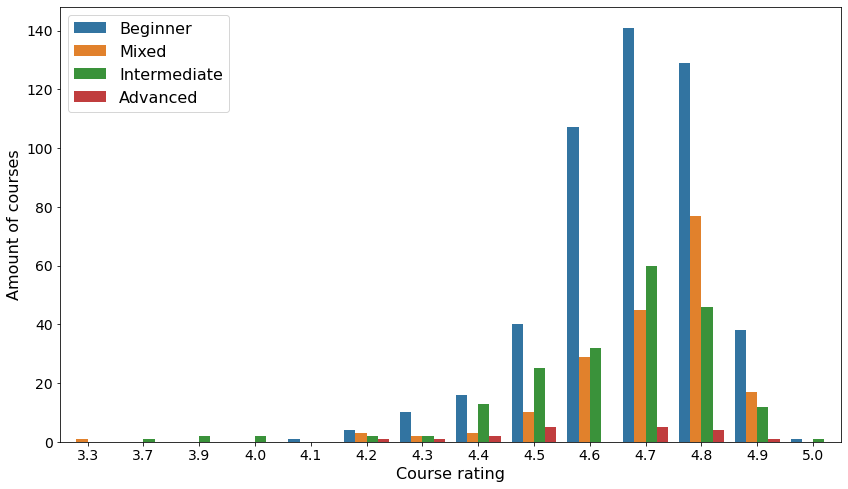

In [17]:
fig,ax = plt.subplots(figsize=(14,8))

sns.countplot(data=df,x = 'course_rating', hue='course_difficulty')

ax.set_xlabel("Course rating", fontsize=16)
plt.legend(fontsize = 16, loc=2)
ax.set_xlabel("Course rating", fontsize=16)
ax.set_ylabel("Amount of courses", fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()

**Distribution** of courses according to their **rating** and **certificate type**

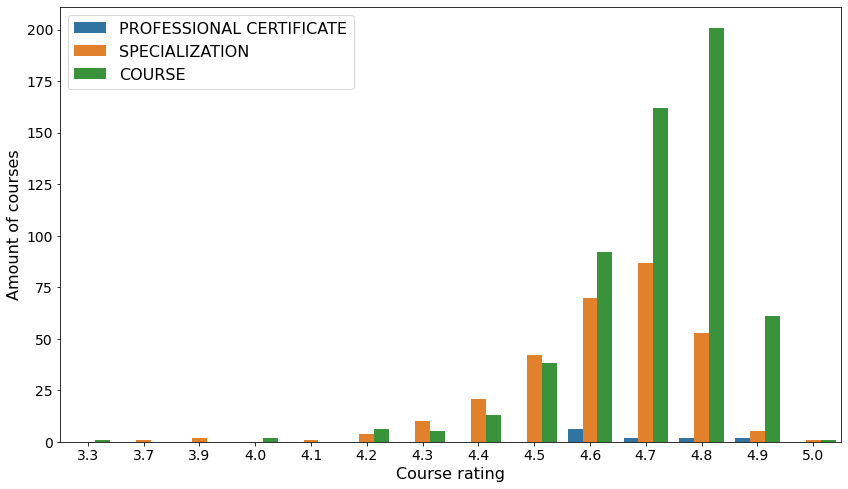

In [18]:
fig,ax = plt.subplots(figsize=(14,8))

sns.countplot(data=df,x = 'course_rating', hue='course_Certificate_type')

ax.set_xlabel("Course rating", fontsize=16)
plt.legend(fontsize = 16, loc=2)
plt.xticks(size=14)
plt.yticks(size=14)
ax.set_xlabel("Course rating", fontsize=16)
ax.set_ylabel("Amount of courses", fontsize=16)
plt.show()

Which course organisers is offering the most of courses? **TOP20**

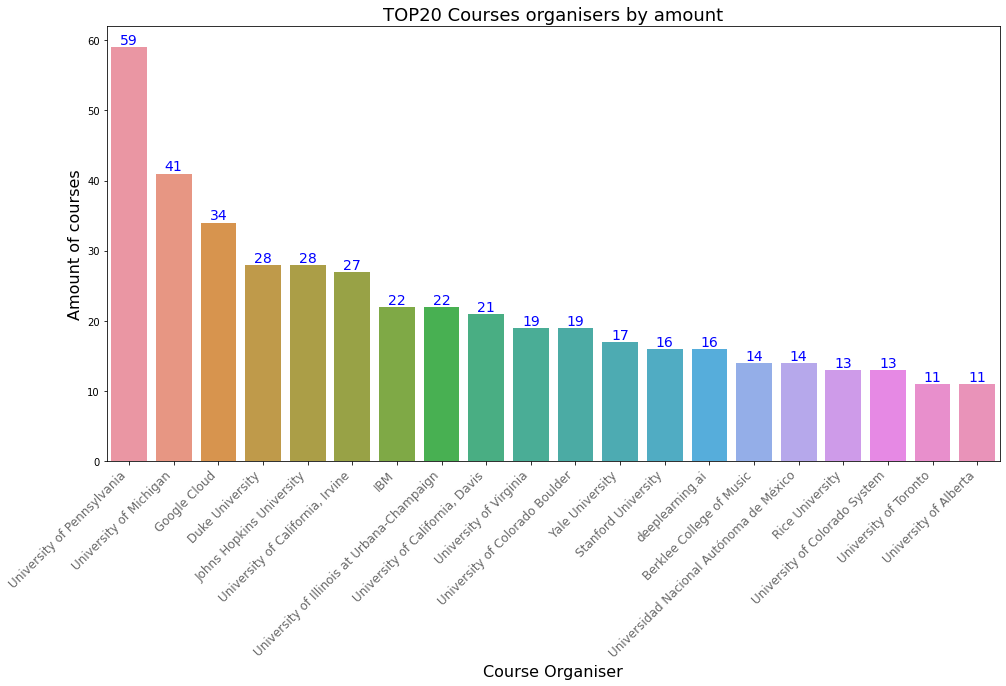

In [19]:
amount_of_courses = pd.DataFrame({"count": df['course_organization'].value_counts()}).head(20)

amount_of_courses = amount_of_courses.transpose()

plt.figure(figsize=(16,8))
ax = sns.barplot(data=amount_of_courses)

ax.set_title("TOP20 Courses organisers by amount", fontsize=18)
ax.set_xlabel("Course Organiser", fontsize=16)
ax.set_ylabel("Amount of courses", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12, color='dimgrey')
ax.bar_label(ax.containers[0], fontsize=14, color='blue')

plt.show()

Which course organisers is offering the best rating courses? **TOP20** mean value (no min. course count) 

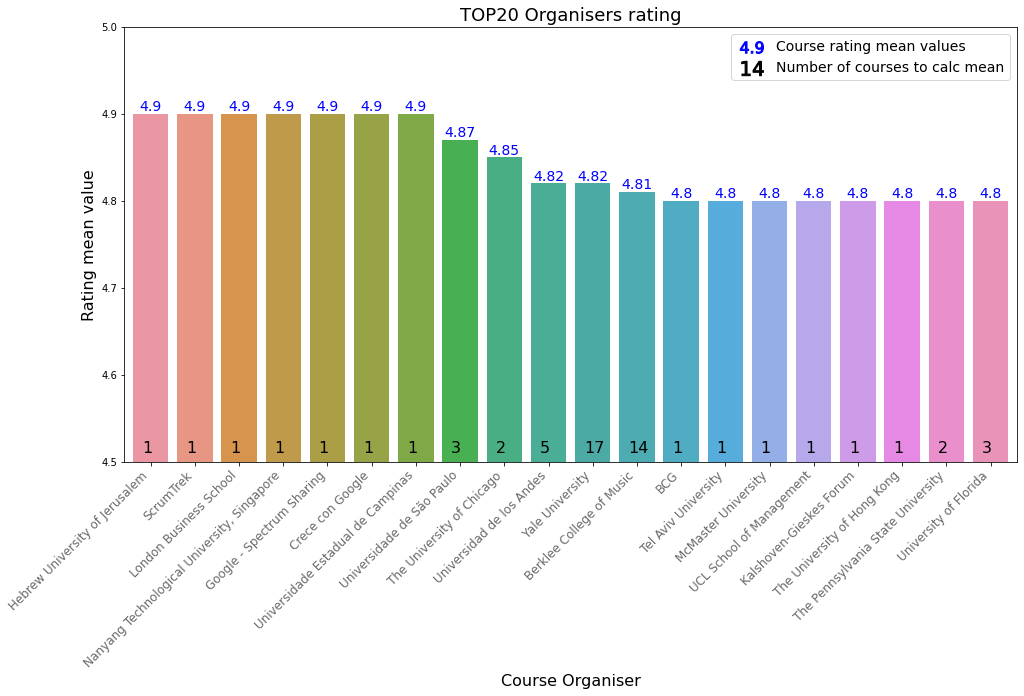

In [20]:
org_rating = df.loc[:, ['course_organization', 'course_rating']]

org_rating = pd.DataFrame({"course_rating": org_rating.groupby('course_organization')['course_rating'].mean().round(2),
                           "course_counter" : org_rating['course_organization'].value_counts()})

org_rating = org_rating.reset_index()
org_rating = org_rating.rename(columns={"index": "course_organization"})

org_rating = org_rating.sort_values(by=['course_rating'], ascending=False).head(20)

# getting a list of course counter for every organiser
course_counter = org_rating["course_counter"].to_list()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x = org_rating['course_organization'], y = org_rating['course_rating'])

ax.set_title("TOP20 Organisers rating", fontsize=18)
ax.set_xlabel("Course Organiser", fontsize=16)
ax.set_ylabel("Rating mean value", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12, color='dimgrey')
ax.bar_label(ax.containers[0], fontsize=14, color='blue')
ax.set_ylim([4.5, 5])

for j, i in enumerate(ax.patches):
    ax.text(i.get_x()+ 0.20, 4.51, str(int(course_counter[j])), fontsize=16)

ax.scatter([], [], marker='$4.9$', label='Course rating mean values', color='blue')
ax.scatter([], [], marker='$14$', label='Number of courses to calc mean', color='black')

ax.margins(x=0.01)
ax.legend(markerscale=4, fontsize=14)

plt.show()

Which course **organisers** is offering the **best rating** courses with a mean rating value of **minimum 10
courses** **TOP20**

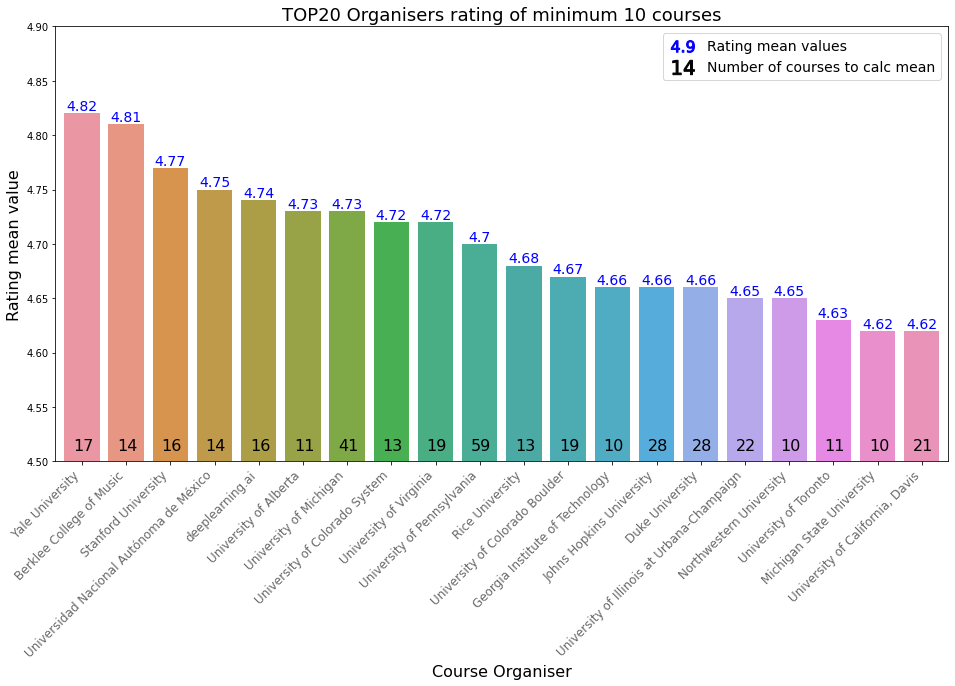

In [21]:
org_rating = df.loc[:, ['course_organization', 'course_rating']]

# filtering out course organisers with less than 10 organised courses
org_rating = df.groupby("course_organization").filter(lambda x: len(x) >= 10)

org_rating = pd.DataFrame({"course_rating": org_rating.groupby('course_organization')['course_rating'].mean().round(2),
                           "course_counter" : org_rating['course_organization'].value_counts()})

org_rating = org_rating.reset_index()
org_rating = org_rating.rename(columns={"index": "course_organization"})

org_rating = org_rating.sort_values(by=['course_rating'], ascending=False).head(20)

# getting a list of course counter for every organiser
course_counter = org_rating["course_counter"].to_list()

plt.figure(figsize=(16, 8))
ax = sns.barplot(x = org_rating['course_organization'], y = org_rating['course_rating'])

ax.set_title("TOP20 Organisers rating of minimum 10 courses", fontsize=18)
ax.set_xlabel("Course Organiser", fontsize=16)
ax.set_ylabel("Rating mean value", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12, color='dimgrey')
ax.bar_label(ax.containers[0], fontsize=14, color='blue')
ax.set_ylim([4.5, 4.9])

for j, i in enumerate(ax.patches):
    ax.text(i.get_x()+ 0.20, 4.51, str(int(course_counter[j])), fontsize=16)

ax.scatter([], [], marker='$4.9$', label='Rating mean values', color='blue')
ax.scatter([], [], marker='$14$', label='Number of courses to calc mean', color='black')

ax.margins(x=0.01)
ax.legend(markerscale=4, fontsize=14)

plt.show()

**TOP20** organisers by students enrolled

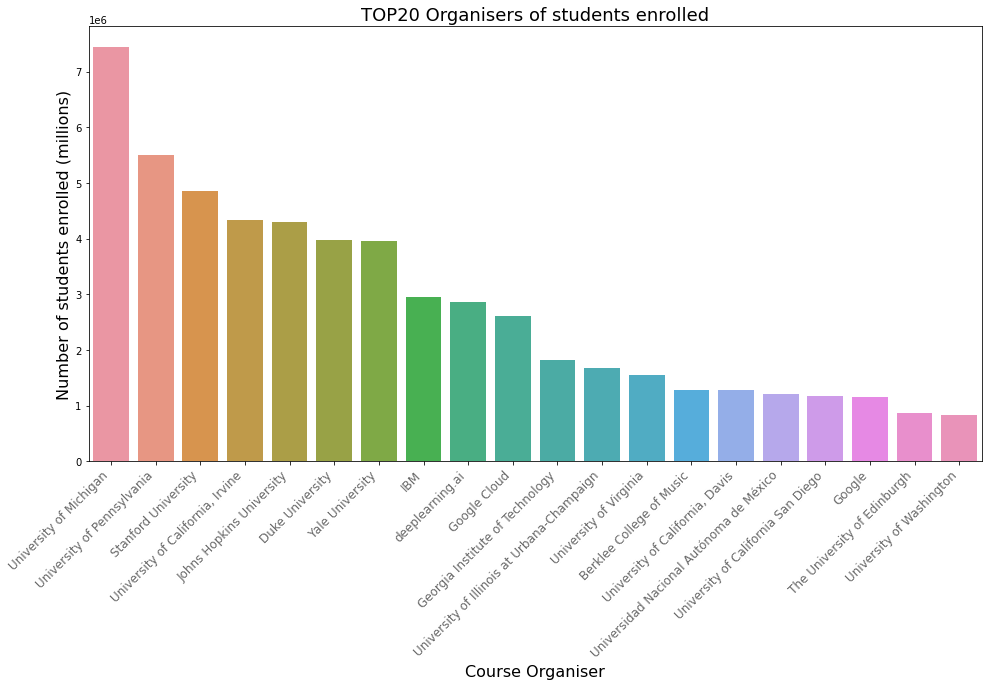

In [22]:
students_enrolled = pd.DataFrame({"students": df.groupby('course_organization')['course_students_enrolled'].agg('sum')})

students_enrolled = students_enrolled.sort_values(by=["students"], ascending=False).head(20)
students_enrolled = students_enrolled.transpose()

plt.figure(figsize=(16,8))
ax = sns.barplot(data=students_enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12, color='dimgrey')
ax.set_title("TOP20 Organisers of students enrolled", fontsize=18)
ax.set_xlabel("Course Organiser", fontsize=16)
ax.set_ylabel("Number of students enrolled (millions)", fontsize=16)

plt.show()

**TOP20** courses by students enrolled

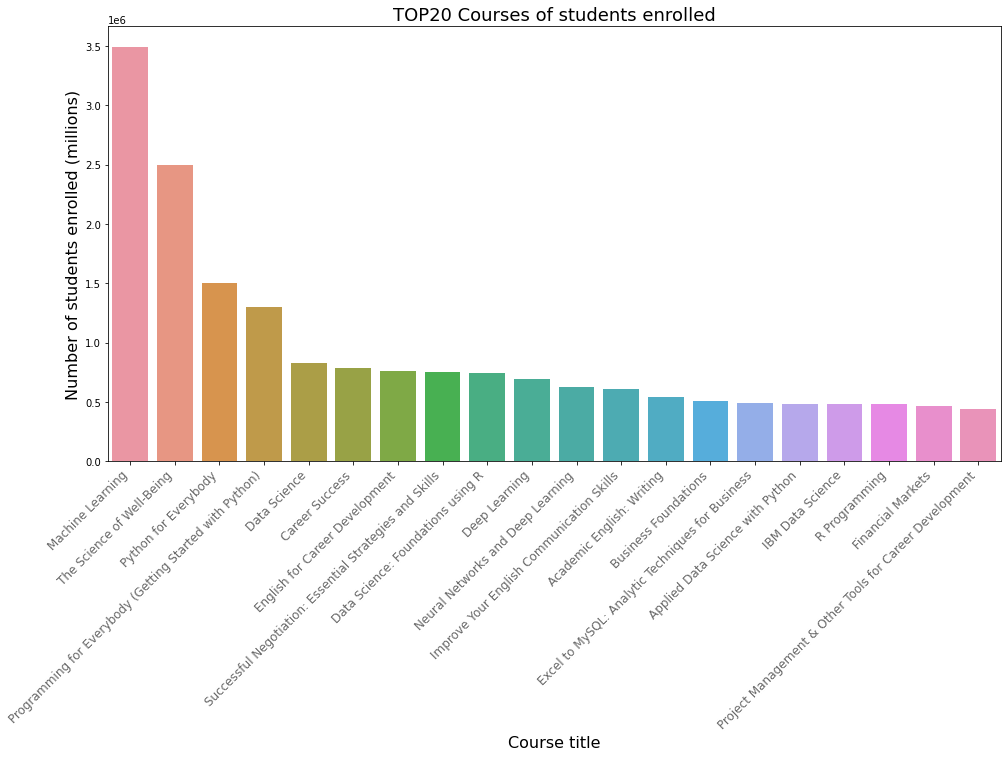

In [23]:
students_enrolled = pd.DataFrame({"students": df.groupby('course_title')['course_students_enrolled'].agg('sum')})

students_enrolled = students_enrolled.sort_values(by=["students"], ascending=False).head(20)
students_enrolled = students_enrolled.transpose()

plt.figure(figsize=(16,8))
ax = sns.barplot(data=students_enrolled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12, color='dimgrey')
ax.set_title("TOP20 Courses of students enrolled", fontsize=18)
ax.set_xlabel("Course title", fontsize=16)
ax.set_ylabel("Number of students enrolled (millions)", fontsize=16)

plt.show()

Below we may see a very week positive relation (close to no relation) of `course rating` vs amount of `students enrolled`

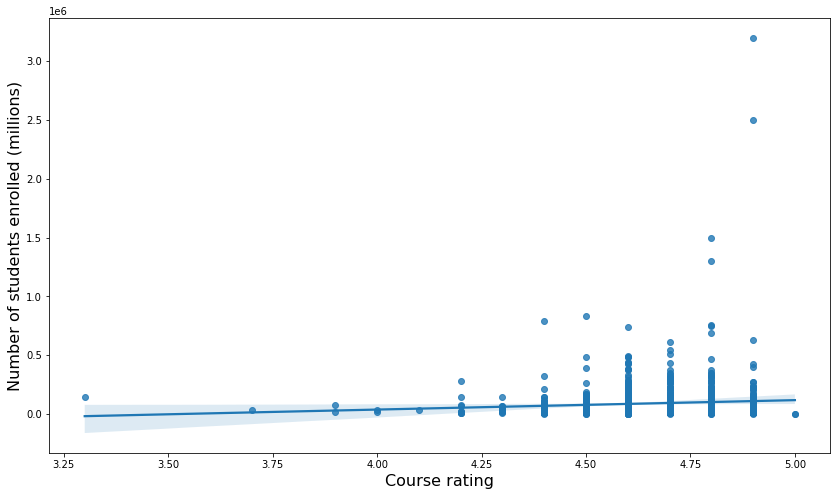

In [24]:
course_rating = df.loc[:, ['course_students_enrolled', 'course_title', 'course_rating']]

course_rating = pd.DataFrame({"students": course_rating.groupby(['course_title', 'course_rating'])
['course_students_enrolled'].agg('sum')})

course_rating = course_rating.sort_values(by=["students"], ascending=False)

course_rating = course_rating.reset_index()

plt.figure(figsize=(14,8))
ax = sns.regplot(x=course_rating['course_rating'], y=course_rating['students'])
ax.set_xlabel("Course rating", fontsize=16)
ax.set_ylabel("Number of students enrolled (millions)", fontsize=16)

plt.show()

In [25]:
df.corr()

,course_rating,course_students_enrolled
course_rating,1.00000,0.07109
course_students_enrolled,0.07109,1.00000


Number of **students enrolled** by `course difficulty`

In [26]:
difficulty_students_sum = pd.DataFrame(df.groupby("course_difficulty")["course_students_enrolled"].agg('sum'))
difficulty_students_sum = difficulty_students_sum.sort_values(by=["course_students_enrolled"], ascending=False).reset_index()
difficulty_students_sum

,course_difficulty,course_students_enrolled
0,Beginner,39921800.0
1,Mixed,24989400.0
2,Intermediate,14506300.0
3,Advanced,1264400.0


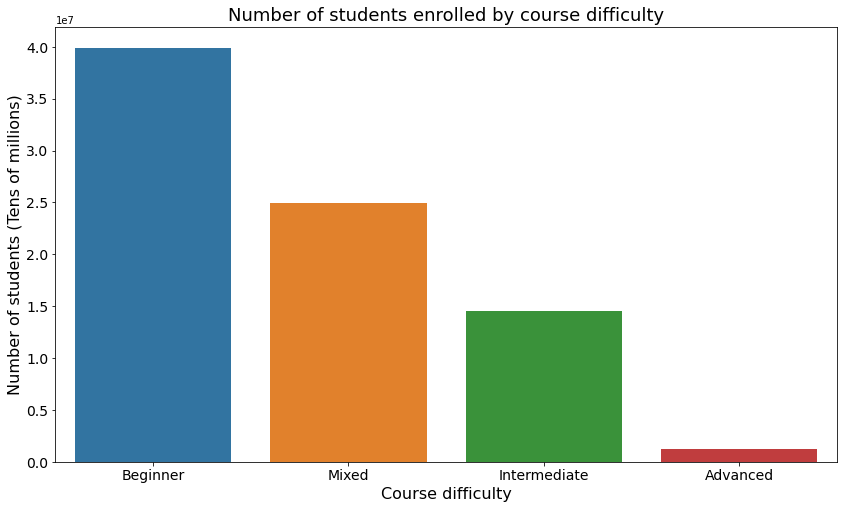

In [27]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=difficulty_students_sum['course_difficulty'], y=difficulty_students_sum['course_students_enrolled'])

ax.set_title("Number of students enrolled by course difficulty", fontsize=18)
ax.set_xlabel("Course difficulty", fontsize=16)
ax.set_ylabel("Number of students (Tens of millions)", fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()

Number of **students enrolled** by `course certificate type`

In [28]:
type_students_sum = pd.DataFrame(df.groupby("course_Certificate_type")["course_students_enrolled"].agg('sum'))
type_students_sum = type_students_sum.sort_values(by=["course_students_enrolled"], ascending=False).reset_index()
type_students_sum

,course_Certificate_type,course_students_enrolled
0,COURSE,51131300.0
1,SPECIALIZATION,27262200.0
2,PROFESSIONAL CERTIFICATE,2288400.0


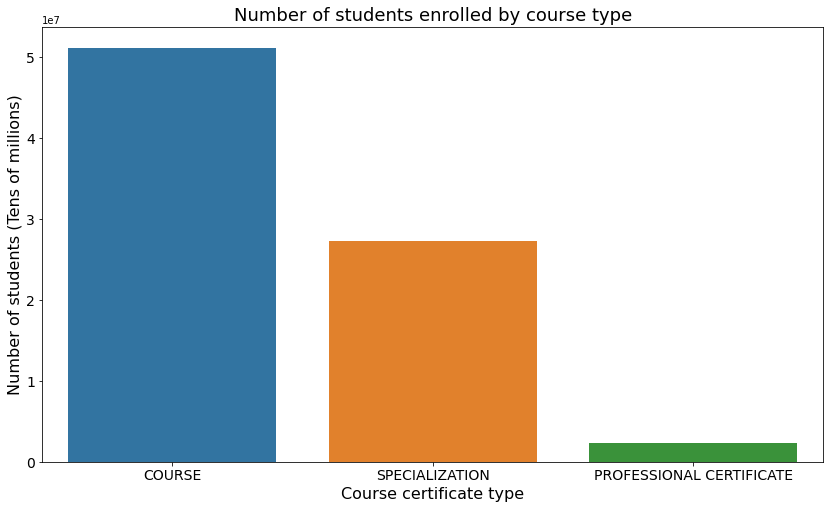

In [29]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=type_students_sum['course_Certificate_type'], y=type_students_sum['course_students_enrolled'])

ax.set_title("Number of students enrolled by course type", fontsize=18)
ax.set_xlabel("Course certificate type", fontsize=16)
ax.set_ylabel("Number of students (Tens of millions)", fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()

The average values per course type

In [30]:
df_pivot = df.pivot_table(values='course_rating', index='course_Certificate_type', aggfunc=[np.std, np.mean])
df_pivot.loc[(['PROFESSIONAL CERTIFICATE', 'SPECIALIZATION', 'COURSE'])].sort_values(('mean', 'course_rating'))

,std,mean
,course_rating,course_rating
course_Certificate_type,,
SPECIALIZATION,0.167874,4.618182
PROFESSIONAL CERTIFICATE,0.120605,4.700000
COURSE,0.151647,4.707045


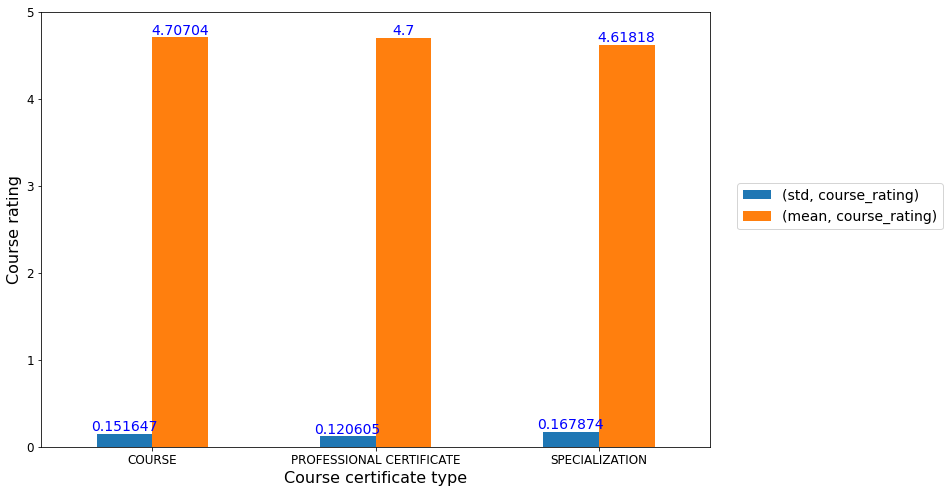

In [31]:
ax = df_pivot.plot(kind="bar", figsize=(12,8))

for j in range(2):
    plt.bar_label(ax.containers[j], fontsize=14, color='blue')

plt.xlabel("Course certificate type", fontsize=16)
plt.ylabel("Course rating", fontsize=16)

plt.ylim([0, 5])
plt.legend(loc=(1.04, 0.5), title="", fontsize=14)
plt.xticks(size=12, rotation=0)
plt.yticks(size=12)

plt.show()

The average values per course difficulty

In [32]:
df_pivot = df.pivot_table(values='course_rating', index='course_difficulty', aggfunc=[np.std, np.mean])
df_pivot.loc[(['Beginner', 'Mixed', 'Intermediate', 'Advanced'])].sort_values(('mean', 'course_rating'))

,std,mean
,course_rating,course_rating
course_difficulty,,
Advanced,0.194365,4.600000
Intermediate,0.188939,4.646465
Beginner,0.141947,4.680903
Mixed,0.170803,4.708556


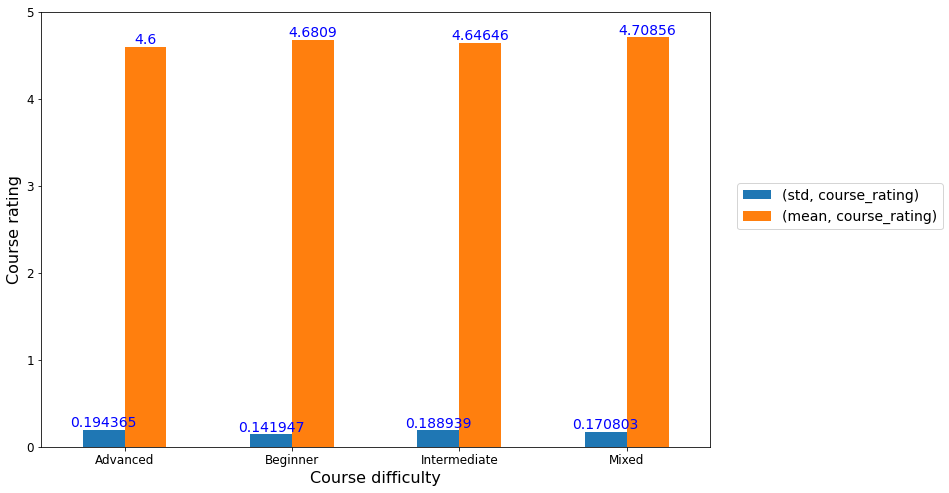

In [33]:
ax = df_pivot.plot(kind="bar", figsize=(12,8))

for j in range(2):
    plt.bar_label(ax.containers[j], fontsize=14, color='blue')

plt.xlabel("Course difficulty", fontsize=16)
plt.ylabel("Course rating", fontsize=16)

plt.ylim([0, 5])
plt.legend(loc=(1.04, 0.5), title="", fontsize=14)
plt.xticks(size=12, rotation=0)
plt.yticks(size=12)

plt.show()